<a href="https://colab.research.google.com/github/Xayzan/Ybif-Project/blob/main/Bank_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

In [ ]:
df=pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Bank%20Churn%20Modelling.csv')

In [ ]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [ ]:
df.columns


Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'Num Of Products', 'Has Credit Card',
       'Is Active Member', 'Estimated Salary', 'Churn'],
      dtype='object')

In [ ]:
df.duplicated('CustomerId').sum()

0

In [ ]:
df=df.set_index('CustomerId')

In [ ]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [ ]:
df.replace({'Geography':{'France':2,'Germany':1,'Spain':0}},inplace=True)

In [ ]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [ ]:
df.replace({'Gender':{'Male':1,'Female':0}},inplace=True)

In [ ]:
df['Num Of Products'].value_counts()

1    5084
2    4590
3     266
4      60
Name: Num Of Products, dtype: int64

In [ ]:
df.replace({'Num Of Products':{1:0,2:1,3:1,4:1}},inplace=True)

In [ ]:
df['Has Credit Card'].value_counts()

1    7055
0    2945
Name: Has Credit Card, dtype: int64

In [ ]:
df['Is Active Member'].value_counts()

1    5151
0    4849
Name: Is Active Member, dtype: int64

In [ ]:
df.loc[(df['Balance']==0),'Churn'].value_counts()

0    3117
1     500
Name: Churn, dtype: int64

In [ ]:
df['Zero Balance']=np.where(df['Balance']>0,1,0)

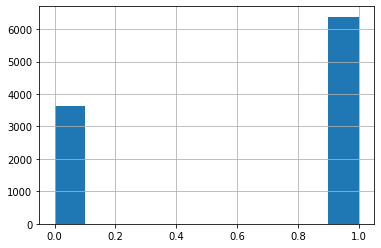

In [ ]:
df['Zero Balance'].hist()

In [ ]:
df.groupby(['Churn','Geography']).count()

Surname  CreditScore  Gender   Age  Tenure  Balance  \
Churn Geography                                                        
0     0             2064         2064    2064  2064    2064     2064   
      1             1695         1695    1695  1695    1695     1695   
      2             4204         4204    4204  4204    4204     4204   
1     0              413          413     413   413     413      413   
      1              814          814     814   814     814      814   
      2              810          810     810   810     810      810   

                 Num Of Products  Has Credit Card  Is Active Member  \
Churn Geography                                                       
0     0                     2064             2064              2064   
      1                     1695             1695              1695   
      2                     4204             4204              4204   
1     0                      413              413               413   
      1                      814              814               814   
      2                      810              810               810   

                 Estimated Salary  Zero Balance  
Churn Geography                                  
0     0                      2064          2064  
      1                      1695          1695  
      2                      4204          4204  
1     0                       413           413  
      1                       814           814  
      2                       810           810

In [ ]:
df.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'Num Of Products', 'Has Credit Card', 'Is Active Member',
       'Estimated Salary', 'Churn', 'Zero Balance'],
      dtype='object')

In [ ]:
x=df.drop(['Surname','Churn'],axis=1)

In [ ]:
y=df['Churn']

In [ ]:
x.shape,y.shape

((10000, 11), (10000,))

In [ ]:
df['Churn'].value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

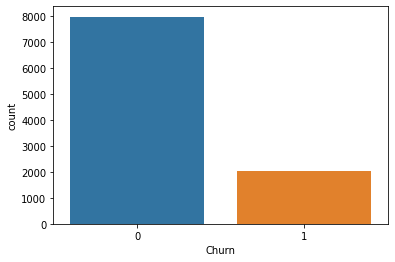

In [ ]:
sns.countplot(x='Churn',data=df)

In [ ]:
x.shape,y.shape

((10000, 11), (10000,))

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
rus=RandomUnderSampler(random_state=19529)

In [ ]:
x_rus,y_rus=rus.fit_resample(x,y)

In [ ]:
x_rus.shape,y_rus.shape,x.shape,y.shape

((4074, 11), (4074,), (10000, 11), (10000,))

In [ ]:
y.value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

In [ ]:
y_rus.value_counts()

0    2037
1    2037
Name: Churn, dtype: int64

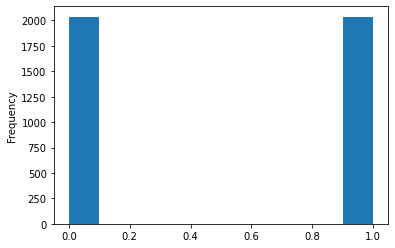

In [ ]:
y_rus.plot(kind='hist')

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
ros=RandomOverSampler(random_state=19529)

In [ ]:
x_ros,y_ros=rus.fit_resample(x,y)

In [ ]:
x_ros.shape,y_ros.shape,x.shape,y.shape

((4074, 11), (4074,), (10000, 11), (10000,))

In [ ]:
y.value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

In [ ]:
y_ros.value_counts()

0    2037
1    2037
Name: Churn, dtype: int64

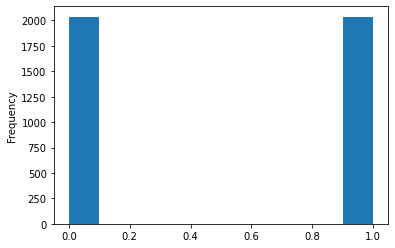

In [ ]:
y_ros.plot(kind='hist')

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.3, random_state=19529)

In [ ]:
x_train_rus, x_test_rus, y_train_rus, y_test_rus=train_test_split(x_rus,y_rus,test_size=0.3, random_state=19529)

In [ ]:
x_train_ros, x_test_ros, y_train_ros, y_test_ros=train_test_split(x_ros,y_ros,test_size=0.3, random_state=19529)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
ss=StandardScaler()

In [ ]:
x_train[['CreditScore','Age','Tenure','Balance','Estimated Salary']]=ss.fit_transform(x_train[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

In [ ]:
x_test[['CreditScore','Age','Tenure','Balance','Estimated Salary']]=ss.fit_transform(x_test[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

In [ ]:
x_train_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']]=ss.fit_transform(x_train_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

In [ ]:
x_test_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']]=ss.fit_transform(x_test_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc=SVC()

In [ ]:
svc.fit(x_train,y_train)

SVC()

In [ ]:
y_pred=svc.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
confusion_matrix(y_test,y_pred)

array([[2381,   33],
       [ 436,  150]])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91      2414
           1       0.82      0.26      0.39       586

    accuracy                           0.84      3000
   macro avg       0.83      0.62      0.65      3000
weighted avg       0.84      0.84      0.81      3000



In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid={'C':[0,1,1,10],
            'gamma':[1,0.1,0.01],
            'kernel':['rbf'],
            'class_weight':['balanced']}

In [ ]:
grid=GridSearchCV(SVC(),param_grid,refit=True,verbose=2,cv=2)

In [ ]:
grid.fit(x_train,y_train)

Fitting 2 folds for each of 12 candidates, totalling 24 fits
[CV] END ....C=0, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ....C=0, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ..C=0, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ..C=0, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .C=0, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .C=0, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.6s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.6s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.1s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.2s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.3s
[CV] END .C=1, class_weight=balanced, gamma=0.01

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
6 fits failed out of a total of 24.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py", line 255, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py", line 333, in _dense_fit
    random_seed=random_seed,
  File "sklearn/svm/_libsvm.pyx", line 189

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0, 1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [ ]:
print(grid.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=1)


In [ ]:
grid_predictions=grid.predict(x_test)

In [ ]:
confusion_matrix(y_test,grid_predictions)

array([[2159,  255],
       [ 343,  243]])

In [ ]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88      2414
           1       0.49      0.41      0.45       586

    accuracy                           0.80      3000
   macro avg       0.68      0.65      0.66      3000
weighted avg       0.79      0.80      0.79      3000



In [ ]:
svc_rus=SVC()

In [ ]:
svc_rus.fit(x_train_rus,y_train_rus)

SVC()

In [ ]:
y_pred_rus=svc_rus.predict(x_test_rus)

In [ ]:
confusion_matrix(y_test_rus,y_pred_rus)

array([[253, 374],
       [151, 445]])

In [ ]:
print(classification_report(y_test_rus,y_pred_rus))

              precision    recall  f1-score   support

           0       0.63      0.40      0.49       627
           1       0.54      0.75      0.63       596

    accuracy                           0.57      1223
   macro avg       0.58      0.58      0.56      1223
weighted avg       0.59      0.57      0.56      1223



In [ ]:
grid_rus=GridSearchCV(SVC(),param_grid,refit=True,verbose=2,cv=2)
grid_rus.fit(x_train_rus,y_train_rus)

Fitting 2 folds for each of 12 candidates, totalling 24 fits
[CV] END ....C=0, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ....C=0, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ..C=0, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ..C=0, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .C=0, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .C=0, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.4s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.6s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.7s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.7s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.6s
[CV] END .C=1, class_weight=balanced, gamma=0.01

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
6 fits failed out of a total of 24.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py", line 255, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py", line 333, in _dense_fit
    random_seed=random_seed,
  File "sklearn/svm/_libsvm.pyx", line 189

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0, 1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [ ]:
print(grid_rus.best_estimator_)

SVC(C=1, class_weight='balanced', gamma=0.01)


In [ ]:
grid_predictions_rus=grid_rus.predict(x_test_rus)

In [ ]:
confusion_matrix(y_test_rus,grid_predictions_rus)

array([[  2, 625],
       [  0, 596]])

In [ ]:
print(classification_report(y_test_rus,grid_predictions_rus))

              precision    recall  f1-score   support

           0       1.00      0.00      0.01       627
           1       0.49      1.00      0.66       596

    accuracy                           0.49      1223
   macro avg       0.74      0.50      0.33      1223
weighted avg       0.75      0.49      0.32      1223

